> As the number of attributes becomes large, exploratory analysis of the all the predictors may be infeasible and concentrating on those with strong relationships with the outcome may be an effective triaging strategy. 

In [1]:
library(AppliedPredictiveModeling)
data(solubility)

In [2]:
ls()

[1] "solTestX"       "solTestXtrans"  "solTestY"       "solTrainX"     
[5] "solTrainXtrans" "solTrainY"

In [4]:
str(solTrainXtrans)
str(solTrainY)

'data.frame':	951 obs. of  228 variables:
 $ FP001            : int  0 0 1 0 0 1 0 1 1 1 ...
 $ FP002            : int  1 1 1 0 0 0 1 0 0 1 ...
 $ FP003            : int  0 0 1 1 1 1 0 1 1 1 ...
 $ FP004            : int  0 1 1 0 1 1 1 1 1 1 ...
 $ FP005            : int  1 1 1 0 1 0 1 0 0 1 ...
 $ FP006            : int  0 1 0 0 1 0 0 0 1 1 ...
 $ FP007            : int  0 1 0 1 0 0 0 1 1 1 ...
 $ FP008            : int  1 1 1 0 0 0 1 0 0 0 ...
 $ FP009            : int  0 0 0 0 1 1 1 0 1 0 ...
 $ FP010            : int  0 0 1 0 0 0 0 0 0 0 ...
 $ FP011            : int  0 1 0 0 0 0 0 0 1 0 ...
 $ FP012            : int  0 0 0 0 0 1 0 1 0 0 ...
 $ FP013            : int  0 0 0 0 1 0 1 0 0 0 ...
 $ FP014            : int  0 0 0 0 0 0 1 0 0 0 ...
 $ FP015            : int  1 1 1 1 1 1 1 1 1 1 ...
 $ FP016            : int  0 1 0 0 1 1 0 1 0 0 ...
 $ FP017            : int  0 0 1 1 0 0 0 0 1 1 ...
 $ FP018            : int  0 1 0 0 0 0 0 0 0 0 ...
 $ FP019            : int  1 0 0 0 1 0 1

NULL

 num [1:951] -3.97 -3.98 -3.99 -4 -4.06 -4.08 -4.08 -4.1 -4.1 -4.11 ...


In [5]:
cor(solTrainXtrans$NumCarbon,solTrainY)

[1] -0.6067917

`Numeric Outcomes`

[A worked example: evaluating the relationship between two hormones](http://content.csbs.utah.edu/~rogers/datanal/labprj/bootstrap/index.html)

> 如果变量之间近线性或者曲线相关，那么使用Spearman相关系数更加有效

In [17]:
#Spearman Rank Correlation
# cor(solTrainX$NumCarbon,solTrainY)
cor.test(solTrainX$NumCarbon,solTrainY, method="pearson")
cor.test(solTrainX$NumCarbon,solTrainY, method="spearman")


	Pearson's product-moment correlation

data:  solTrainX$NumCarbon and solTrainY
t = -22.091, df = 949, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.6232429 -0.5391645
sample estimates:
       cor 
-0.5827611 


Warning message in cor.test.default(solTrainX$NumCarbon, solTrainY, method = "spearman"):
"Cannot compute exact p-value with ties"


	Spearman's rank correlation rho

data:  solTrainX$NumCarbon and solTrainY
S = 239900000, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.6735911 


&#x1F4A1;`computing`

In [2]:
fp_cols <- grepl("FP",names(solTrainXtrans))
numeric_cols <- names(solTrainXtrans)[!fp_cols]

corr_info <- apply(solTrainXtrans[,numeric_cols],2,FUN = function(x,y) cor(x,y), y=solTrainY)

In [3]:
head(corr_info)

MolWeight     NumAtoms NumNonHAtoms     NumBonds NumNonHBonds NumMultBonds 
  -0.6585284   -0.4358113   -0.5836236   -0.4590395   -0.5851968   -0.4804159

In [3]:
corr_info_spearman <- apply(solTrainXtrans[,numeric_cols],2,FUN = function(x,y) cor(x,y,method = "spearman"), y=solTrainY)

In [4]:
head(corr_info_spearman)

MolWeight     NumAtoms NumNonHAtoms     NumBonds NumNonHBonds NumMultBonds 
  -0.6852988   -0.5198317   -0.6296540   -0.5483985   -0.6322837   -0.4797135

In [42]:
corrs <- data.frame(Predictor=names(corr_info),
                   Correlation = corr_info,
                   RankCorrelation = corr_info_spearman)
head(corrs)

,Predictor,Correlation,RankCorrelation
MolWeight,MolWeight,-0.6585284,-0.6852988
NumAtoms,NumAtoms,-0.4358113,-0.5198317
NumNonHAtoms,NumNonHAtoms,-0.5836236,-0.6296540
NumBonds,NumBonds,-0.4590395,-0.5483985
NumNonHBonds,NumNonHBonds,-0.5851968,-0.6322837
NumMultBonds,NumMultBonds,-0.4804159,-0.4797135


`LOESS  Locally Weighted Regression`

In [5]:
smoother <- loess(solTrainY~solTrainXtrans$NumCarbon)
smoother

Call:
loess(formula = solTrainY ~ solTrainXtrans$NumCarbon)

Number of Observations: 951 
Equivalent Number of Parameters: 5.3 
Residual Standard Error: 1.548 

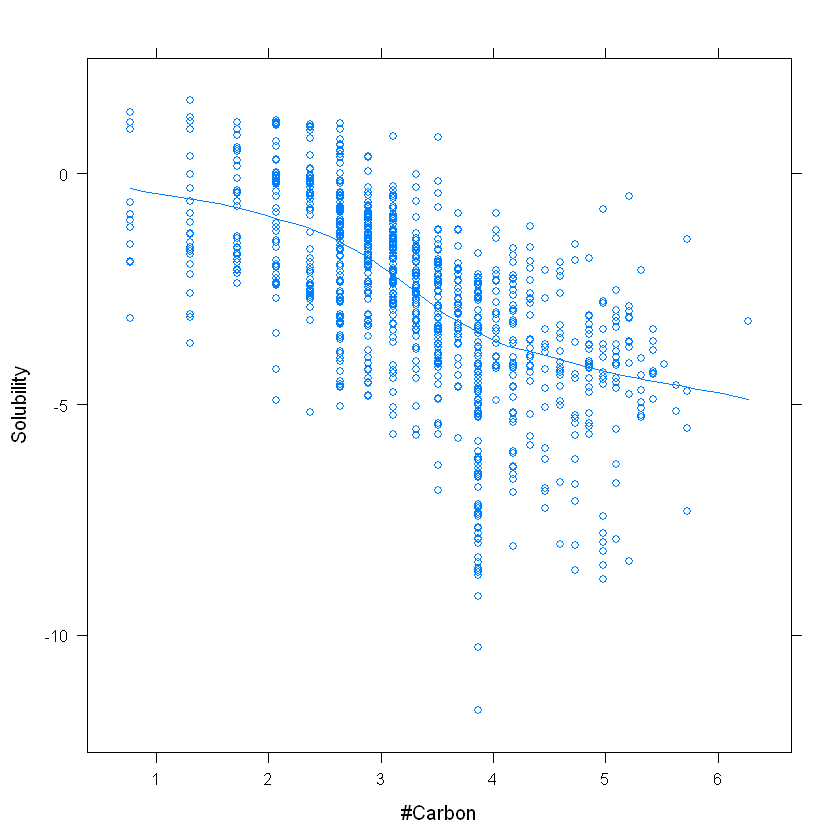

In [6]:
library(lattice)
xyplot(solTrainY~solTrainXtrans$NumCarbon,
       type=c("p","smooth"),
       xlab="#Carbon",
       ylab="Solubility")

In [21]:
library(caret)
varimp_loess <- filterVarImp(x=solTrainXtrans[,numeric_cols],
                            y=solTrainY,nonpara=T)
head(varimp_loess)
names(varimp_loess)[1] <- "Smoother"

,Smoother
MolWeight,0.4443931
NumAtoms,0.1899315
NumNonHAtoms,0.3406166
NumBonds,0.2107173
NumNonHBonds,0.3424552
NumMultBonds,0.2307995


In [11]:
# install.packages("minerva")
library(minerva)
mic_info <- mine(solTrainXtrans[,numeric_cols],solTrainY)
names(mic_info)
head(mic_info$MIC)

[1] "MIC"   "MAS"   "MEV"   "MCN"   "MICR2" "GMIC"  "TIC"

,Y
MolWeight,0.4679277
NumAtoms,0.2896815
NumNonHAtoms,0.3947092
NumBonds,0.3268683
NumNonHBonds,0.3919627
NumMultBonds,0.2792600


In [53]:
## The Relief values for regression can be computed using the CORElearn

# SolContPred <- solTrainXtrans[, !grepl("FP", names(solTrainXtrans))]
# numSolPred <- ncol(SolContPred)
# SolContPred$Sol <- solTrainY
# library(CORElearn)

ReliefF <- CORElearn::attrEval(Sol~.,data=SolContPred,estimator = "RReliefFequalK")
ReliefF <- data.frame(Predictor=names(ReliefF),Relief=ReliefF)

In [73]:
dim(varimp_loess)

[1] 20  1

In [77]:
## Combine all
contDescrScores <- cbind(varimp_loess,corrs)
contDescrScores <- cbind(contDescrScores,mic_info$MIC)
contDescrScores <- cbind(contDescrScores,ReliefF)
names(contDescrScores)[5] <- c("MIC")
head(contDescrScores)

,Smoother,Predictor,Correlation,RankCorrelation,MIC,Predictor,Relief
MolWeight,0.4443931,MolWeight,-0.6585284,-0.6852988,0.4679277,MolWeight,0.084734907
NumAtoms,0.1899315,NumAtoms,-0.4358113,-0.5198317,0.2896815,NumAtoms,0.008618179
NumNonHAtoms,0.3406166,NumNonHAtoms,-0.5836236,-0.6296540,0.3947092,NumNonHAtoms,0.036433860
NumBonds,0.2107173,NumBonds,-0.4590395,-0.5483985,0.3268683,NumBonds,0.002422405
NumNonHBonds,0.3424552,NumNonHBonds,-0.5851968,-0.6322837,0.3919627,NumNonHBonds,0.035619406
NumMultBonds,0.2307995,NumMultBonds,-0.4804159,-0.4797135,0.2792600,NumMultBonds,0.051554380


In [78]:
df_splom <- contDescrScores
df_splom$Correlation <- abs(contDescrScores$Correlation)
df_splom$RankCorrelation <- abs(contDescrScores$RankCorrelation)
df_splom$Group <- "Other"
df_splom$Group[grepl("Surface",df_splom$Predictor)] <- "SA"

In [79]:
splom(~df_splom[,c(3,4,2,5)],
     groups=df_splom$Group,
     varnames=c("Correlation", "Rank\nCorrelation", "LOESS", "MIC"))

ERROR: Error in png(tf, width, height, "in", pointsize, bg, res, antialias = antialias): 无法启动png()装置


plot without title

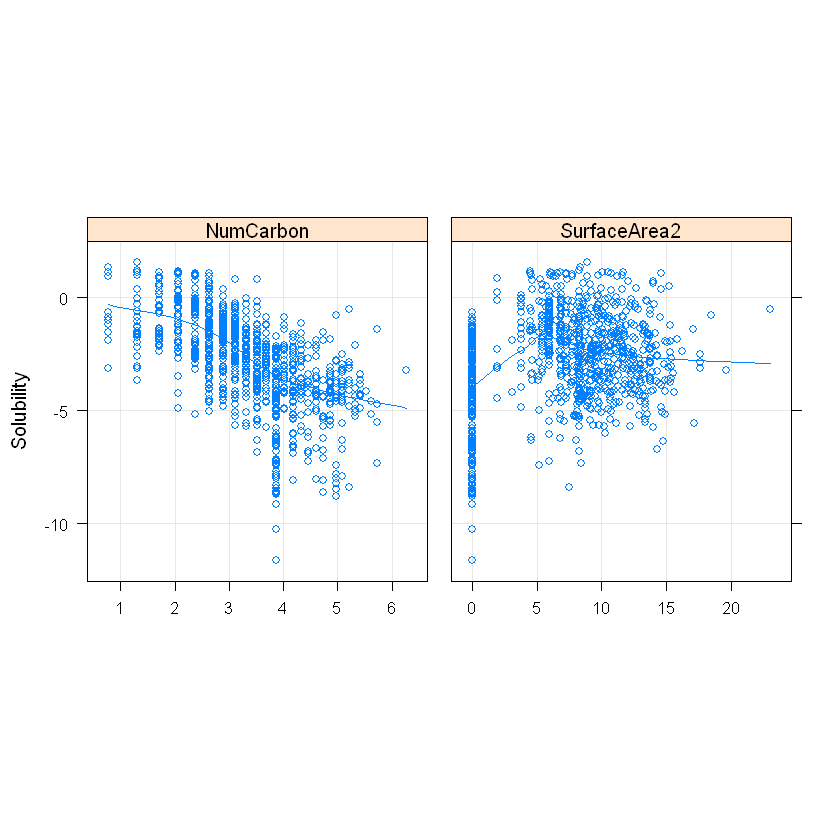

In [60]:
featurePlot(solTrainXtrans[,c("NumCarbon","SurfaceArea2")],
           solTrainY,between=list(x=1),
           type=c("g","p","smooth"),
           df=3,aspect=1,labels=c("","Solubility"))

In [13]:
#for  categorical vars
t.test(solTrainY~solTrainXtrans$FP044)


	Welch Two Sample t-test

data:  solTrainY by solTrainXtrans$FP044
t = 15.198, df = 61.891, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 3.569300 4.650437
sample estimates:
mean in group 0 mean in group 1 
      -2.472237       -6.582105 


In [15]:
str(t.test(solTrainY~solTrainXtrans$FP044))

List of 9
 $ statistic  : Named num 15.2
  ..- attr(*, "names")= chr "t"
 $ parameter  : Named num 61.9
  ..- attr(*, "names")= chr "df"
 $ p.value    : num 1.46e-22
 $ conf.int   : num [1:2] 3.57 4.65
  ..- attr(*, "conf.level")= num 0.95
 $ estimate   : Named num [1:2] -2.47 -6.58
  ..- attr(*, "names")= chr [1:2] "mean in group 0" "mean in group 1"
 $ null.value : Named num 0
  ..- attr(*, "names")= chr "difference in means"
 $ alternative: chr "two.sided"
 $ method     : chr "Welch Two Sample t-test"
 $ data.name  : chr "solTrainY by solTrainXtrans$FP044"
 - attr(*, "class")= chr "htest"


In [17]:
getTstats <- function(x,y)
    {
    tTest <- t.test(y~x)
    out <- c(tStat = tTest$statistic,p=tTest$p.value)
    out
}

t_info <- apply(solTrainXtrans[,fp_cols],MARGIN = 2,FUN = getTstats,y=solTrainY)
t_info <- t(t_info)
head(t_info)

,tStat.t,p
FP001,-4.022040,6.287404e-05
FP002,10.286727,1.351580e-23
FP003,-2.036442,4.198619e-02
FP004,-4.948958,9.551772e-07
FP005,10.282475,1.576549e-23
FP006,-7.875838,9.287835e-15


In [ ]:
## Now look at the categorical (i.e. binary) predictors
SolCatPred <- solTrainXtrans[, grepl("FP", names(solTrainXtrans))]
SolCatPred$Sol <- solTrainY
numSolCatPred <- ncol(SolCatPred) - 1

tests <- apply(SolCatPred[, 1:numSolCatPred], 2,
                  function(x, y)
                    {
                    tStats <- t.test(y ~ x)[c("statistic", "p.value", "estimate")]
                    unlist(tStats)
                    },
               y = solTrainY)
## The results are a matrix with predictors in columns. We reverse this
tests <- as.data.frame(t(tests))
names(tests) <- c("t.Statistic", "t.test_p.value", "mean0", "mean1")
tests$difference <- tests$mean1 - tests$mean0
tests

## Create a volcano plot

xyplot(-log10(t.test_p.value) ~ difference,
       data = tests,
       xlab = "Mean With Structure - Mean Without Structure",
       ylab = "-log(p-Value)",
       type = "p")


> 决定每个二进制预测变量之间关系的最直接的方法是检测每类中结构变量均值是否有差异。

> 比较两组均值最自然地方法是标准t统计量，期本质上就是一个信号和噪音的比例（均值差除以两组方差的函数）。检验p值对应的零假设是"两组间没有显著差异"。该统计量建立在数据是正态分布的假设上。如果数据分布不符合该假设，或许可以使用其他更和更合适的方法（如Wilcoxon秩和检验）

> 哪个预测变量更重要取决于具体环境和数据。如果信号足够大，模型可能可以克服噪声的干扰，在其他情况下，更小但是更精确的差别可能给出更好的表现。

> 当预测变量对应的类多于2个是，可以用方差分析ANOVA的方法探索预测变量的统计显著性，然而，如果检测结果表明各类别对应的均值存在不同，下一步要做的事探索哪里不同。处于此原因，我们需要将该分类变量准化为几个0-1虚拟变量然后用前面的方法决定每一类和结果变量的关联。